<a href="https://colab.research.google.com/github/roshansadath/COMP6721-AppliedAI/blob/main/Simple%20Chest%20XRay/AlexNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
import os, time, random, pandas
import torch
import warnings
import numpy as np
from PIL import Image
from tqdm import tqdm
import torch.nn as nn
import seaborn as sns
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import precision_score, recall_score, f1_score

warnings.filterwarnings("ignore", category=UserWarning)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
#data_path = "/content/drive/MyDrive/Harvard_Chest_XRay/"
data_path = "/content/drive/MyDrive/Simple_Chest_XRay/"
#data_path = "drive/My Drive/NIH_Chest_XRay/"
#data_path = "drive/My Drive/Harvard_Chest_XRay/"

sample_ratio = 1
batch_size = 64
num_epochs = 15

In [ ]:
# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

**DATA PREPROCESSING**

In [ ]:
%run "/content/drive/MyDrive/Colab Notebooks/utils.ipynb"
dataset, train_loader, train_indices, test_loader, test_indices, val_loader, val_indices = data_preprocess(data_path, sample_ratio)

**MODEL TRAINING**

In [ ]:
def save_metrics(loss, accuracy, model):
  np.save("{}{}_train_loss.npy".format(data_path, model), loss)
  np.save("{}{}_train_accuracy.npy".format(data_path, model), accuracy)

In [ ]:
# Define the AlexNet model and set Pretraining to False to train model from scratch
model = torch.hub.load('pytorch/vision:v0.10.0', 'alexnet', pretrained=False)
model.classifier[6] = nn.Linear(4096, len(dataset.classes))
model.to(device)

# Define loss function as CrossEntropy and optimizer as Adam Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)
losses, accuracies, true, pred, v_accuracies, v_losses = [], [], [], [], [], []

# Train model on training set
for epoch in range(num_epochs):
    train_loss, train_accuracy, start_time = 0.0, 0.0, time.time()
    with tqdm(total=len(train_loader), desc=f'Epoch {epoch+1}/{num_epochs}', unit='batch') as pbar:
      for inputs, labels in train_loader:
          inputs = inputs.to(device)
          labels = labels.to(device)

          optimizer.zero_grad()
          outputs = model(inputs)
          _, preds = torch.max(outputs, 1)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()
          train_loss += loss.item() * inputs.size(0)
          train_accuracy += torch.sum(preds == labels.data)
          pred.extend(preds.cpu().numpy())
          true.extend(labels.cpu().numpy())
          
          pbar.set_postfix({'loss': loss.item()})
          pbar.update()

    train_loss /= len(train_indices)
    train_accuracy /= len(train_indices)
    _recall = recall_score(true, pred, average='macro')
    _precision = precision_score(true, pred, average='macro')
    _fscore = f1_score(true, pred, average='macro')

    print('Epoch: {} | Accuracy: {:.4f} | Loss: {:.4f} | Recall: {:.4f} | Precision: {:.4f} | F-Score: {:.4f} | Time: {:.4f}s'.format(epoch+1, train_accuracy, train_loss, _recall, _precision, _fscore, time.time() - start_time))
    val_accuracy, val_loss = evaluate_model(model, val_loader, val_indices, 'VALIDATION', criterion, data_path, "AlexNet")
    v_accuracies.append(val_accuracy)
    v_losses.append(val_loss)
    losses.append(train_loss)
    accuracies.append(train_accuracy.item())

save_metrics(losses, accuracies, "AlexNet")

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
Epoch 1/15: 100%|██████████| 65/65 [05:05<00:00,  4.70s/batch, loss=2.02]


Epoch: 1 | Accuracy: 0.7141 | Loss: 0.8371 | Recall: 0.5036 | Precision: 0.5227 | F-Score: 0.4490 | Time: 305.5388s
MODEL PERFORMANCE ON VALIDATION SET
Accuracy: 0.3396 | Loss: 0.8633 | Recall: 0.5599 | Precision: 0.6264 | F-score: 0.3247



Epoch 2/15: 100%|██████████| 65/65 [01:13<00:00,  1.14s/batch, loss=0.011]

Epoch: 2 | Accuracy: 0.8319 | Loss: 0.3564 | Recall: 0.6288 | Precision: 0.7384 | F-Score: 0.6432 | Time: 73.8629s


MODEL PERFORMANCE ON VALIDATION SET
Accuracy: 0.9147 | Loss: 0.2306 | Recall: 0.8873 | Precision: 0.8837 | F-score: 0.8854



Epoch 3/15: 100%|██████████| 65/65 [01:14<00:00,  1.15s/batch, loss=0.655]

Epoch: 3 | Accuracy: 0.9249 | Loss: 0.2013 | Recall: 0.7198 | Precision: 0.8088 | F-Score: 0.7451 | Time: 74.5168s


MODEL PERFORMANCE ON VALIDATION SET
Accuracy: 0.9420 | Loss: 0.1914 | Recall: 0.9288 | Precision: 0.9173 | F-score: 0.9228



Epoch 4/15: 100%|██████████| 65/65 [01:15<00:00,  1.16s/batch, loss=0.0626]

Epoch: 4 | Accuracy: 0.9280 | Loss: 0.1806 | Recall: 0.7671 | Precision: 0.8368 | F-Score: 0.7912 | Time: 75.5483s


MODEL PERFORMANCE ON VALIDATION SET
Accuracy: 0.9352 | Loss: 0.1930 | Recall: 0.9476 | Precision: 0.8974 | F-score: 0.9180



Epoch 5/15: 100%|██████████| 65/65 [01:15<00:00,  1.16s/batch, loss=0.0163]


Epoch: 5 | Accuracy: 0.9478 | Loss: 0.1422 | Recall: 0.7998 | Precision: 0.8589 | F-Score: 0.8221 | Time: 75.7393s
MODEL PERFORMANCE ON VALIDATION SET
Accuracy: 0.9471 | Loss: 0.1837 | Recall: 0.9556 | Precision: 0.9144 | F-score: 0.9322



Epoch 6/15: 100%|██████████| 65/65 [01:15<00:00,  1.15s/batch, loss=0.242]


Epoch: 6 | Accuracy: 0.9563 | Loss: 0.1224 | Recall: 0.8237 | Precision: 0.8746 | F-Score: 0.8441 | Time: 75.0849s
MODEL PERFORMANCE ON VALIDATION SET
Accuracy: 0.9556 | Loss: 0.1273 | Recall: 0.9425 | Precision: 0.9384 | F-score: 0.9404



Epoch 7/15: 100%|██████████| 65/65 [01:13<00:00,  1.14s/batch, loss=0.028]


Epoch: 7 | Accuracy: 0.9549 | Loss: 0.1353 | Recall: 0.8406 | Precision: 0.8852 | F-Score: 0.8590 | Time: 74.0626s
MODEL PERFORMANCE ON VALIDATION SET
Accuracy: 0.9471 | Loss: 0.1410 | Recall: 0.9322 | Precision: 0.9262 | F-score: 0.9291



Epoch 8/15: 100%|██████████| 65/65 [01:14<00:00,  1.15s/batch, loss=0.0122]


Epoch: 8 | Accuracy: 0.9556 | Loss: 0.1188 | Recall: 0.8535 | Precision: 0.8929 | F-Score: 0.8703 | Time: 74.7486s
MODEL PERFORMANCE ON VALIDATION SET
Accuracy: 0.9505 | Loss: 0.1411 | Recall: 0.9508 | Precision: 0.9226 | F-score: 0.9355



Epoch 9/15: 100%|██████████| 65/65 [01:14<00:00,  1.15s/batch, loss=0.107]


Epoch: 9 | Accuracy: 0.9627 | Loss: 0.1015 | Recall: 0.8646 | Precision: 0.8999 | F-Score: 0.8799 | Time: 74.6432s
MODEL PERFORMANCE ON VALIDATION SET
Accuracy: 0.9437 | Loss: 0.1664 | Recall: 0.8971 | Precision: 0.9492 | F-score: 0.9195



Epoch 10/15: 100%|██████████| 65/65 [01:15<00:00,  1.16s/batch, loss=0.0396]


Epoch: 10 | Accuracy: 0.9615 | Loss: 0.1110 | Recall: 0.8730 | Precision: 0.9055 | F-Score: 0.8873 | Time: 75.8274s
MODEL PERFORMANCE ON VALIDATION SET
Accuracy: 0.9590 | Loss: 0.1252 | Recall: 0.9658 | Precision: 0.9316 | F-score: 0.9469



Epoch 11/15: 100%|██████████| 65/65 [01:15<00:00,  1.16s/batch, loss=6.88e-5]


Epoch: 11 | Accuracy: 0.9654 | Loss: 0.1012 | Recall: 0.8806 | Precision: 0.9102 | F-Score: 0.8938 | Time: 75.3687s
MODEL PERFORMANCE ON VALIDATION SET
Accuracy: 0.9539 | Loss: 0.1656 | Recall: 0.9133 | Precision: 0.9619 | F-score: 0.9345



Epoch 12/15: 100%|██████████| 65/65 [01:14<00:00,  1.14s/batch, loss=0.000331]


Epoch: 12 | Accuracy: 0.9649 | Loss: 0.0966 | Recall: 0.8868 | Precision: 0.9142 | F-Score: 0.8992 | Time: 74.4465s
MODEL PERFORMANCE ON VALIDATION SET
Accuracy: 0.9608 | Loss: 0.1134 | Recall: 0.9482 | Precision: 0.9461 | F-score: 0.9472



Epoch 13/15: 100%|██████████| 65/65 [01:13<00:00,  1.13s/batch, loss=0.00283]


Epoch: 13 | Accuracy: 0.9700 | Loss: 0.0787 | Recall: 0.8925 | Precision: 0.9182 | F-Score: 0.9042 | Time: 73.9068s
MODEL PERFORMANCE ON VALIDATION SET
Accuracy: 0.9642 | Loss: 0.1006 | Recall: 0.9645 | Precision: 0.9426 | F-score: 0.9529



Epoch 14/15: 100%|██████████| 65/65 [01:17<00:00,  1.19s/batch, loss=0.00246]


Epoch: 14 | Accuracy: 0.9715 | Loss: 0.0775 | Recall: 0.8976 | Precision: 0.9216 | F-Score: 0.9086 | Time: 77.2944s
MODEL PERFORMANCE ON VALIDATION SET
Accuracy: 0.9693 | Loss: 0.0891 | Recall: 0.9656 | Precision: 0.9531 | F-score: 0.9591



Epoch 15/15: 100%|██████████| 65/65 [01:14<00:00,  1.15s/batch, loss=0.00101]


Epoch: 15 | Accuracy: 0.9724 | Loss: 0.0765 | Recall: 0.9020 | Precision: 0.9247 | F-Score: 0.9124 | Time: 74.9579s
MODEL PERFORMANCE ON VALIDATION SET
Accuracy: 0.9608 | Loss: 0.0978 | Recall: 0.9389 | Precision: 0.9541 | F-score: 0.9462



In [ ]:
torch.save(model.state_dict(), "{}alexnet.pth".format(data_path))

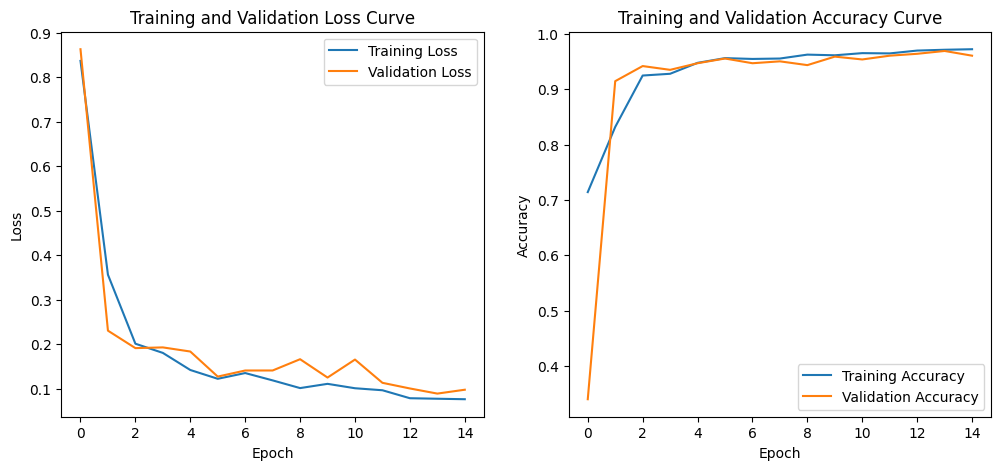

In [ ]:
#Plotting the Loss and Accuracy Curves
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(losses, label = "Training Loss")
ax1.plot(v_losses, label = "Validation Loss")
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Training and Validation Loss Curve')
ax1.legend()

ax2.plot(accuracies, label = "Training Accuracy")
ax2.plot(v_accuracies, label = "Validation Accuracy")
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title('Training and Validation Accuracy Curve')
ax2.legend()

plt.show()

MODEL PERFORMANCE ON TEST SET
Accuracy: 0.9539 | Loss: 0.1345 | Recall: 0.9273 | Precision: 0.9542 | F-score: 0.9396



<Figure size 800x800 with 0 Axes>

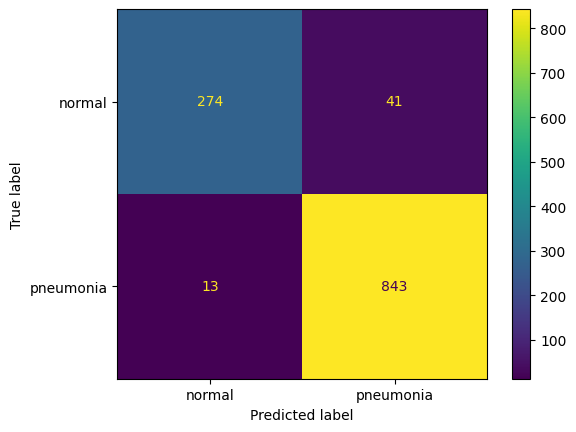

In [ ]:
#Evaluate Model on Test Set
evaluate_model(model, test_loader, test_indices, 'TEST', criterion, data_path, "AlexNet")

In [ ]:
#Obtain TSNE Plot
model.eval()

features, labels = [], []
for images, targets in train_loader:
    images = images.to(device)
    targets = targets.to(device)
    with torch.no_grad():
        output = model(images)
        features.append(output.cpu().numpy())
        labels.append(targets.cpu().numpy())

features = np.vstack(features)
labels = np.concatenate(labels)

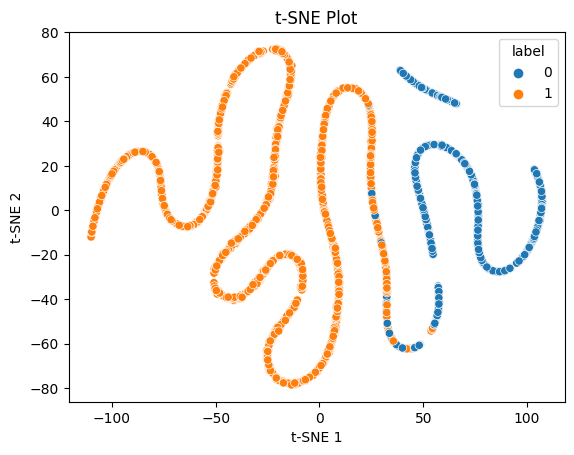

In [ ]:
tsne = TSNE(n_components=2, perplexity = 25, learning_rate = 600, n_iter = 900)
tsne_features = tsne.fit_transform(features)

tsne_df = pandas.DataFrame(data=tsne_features, columns=['t-SNE 1', 't-SNE 2'])
tsne_df['label'] = labels

# Plot the t-SNE plot with seaborn
sns.scatterplot(data=tsne_df, x='t-SNE 1', y='t-SNE 2', hue='label', palette='tab10')
plt.title('t-SNE Plot')
plt.show()


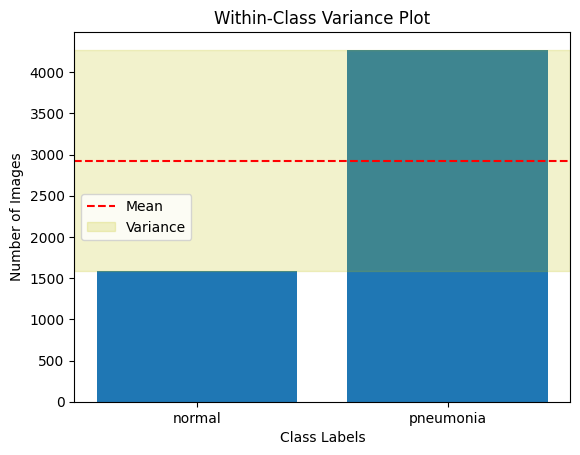

In [ ]:
# Get the class labels and the number of classes
class_labels = dataset.classes
num_classes = len(class_labels)

# Get the number of images per class
num_images_per_class = []
for i in range(num_classes):
    class_indices = np.where(np.array(dataset.targets) == i)[0]
    num_images_per_class.append(len(class_indices))

# Compute the mean and variance of the images per class
mean_num_images = np.mean(num_images_per_class)
var_num_images = np.var(num_images_per_class)

# Plot the within-class variance
fig, ax = plt.subplots()
ax.bar(class_labels, num_images_per_class)
ax.axhline(y=mean_num_images, linestyle='--', color='r', label='Mean')
ax.axhspan(mean_num_images - np.sqrt(var_num_images), mean_num_images + np.sqrt(var_num_images),
           alpha=0.2, color='y', label='Variance')
ax.legend()
plt.xticks(rotation = 0)
plt.ylabel('Number of Images')
plt.xlabel('Class Labels')
plt.title('Within-Class Variance Plot')
plt.show()

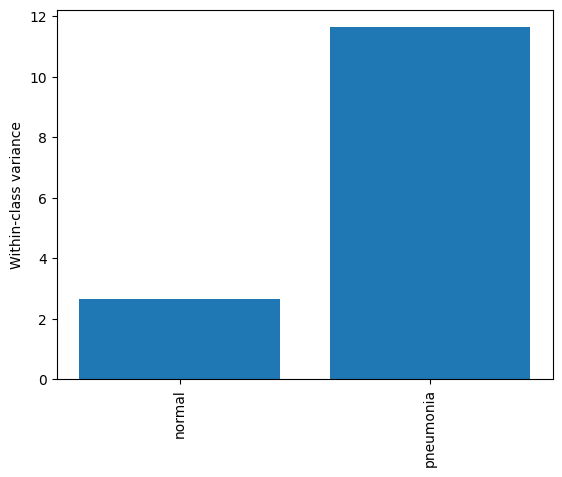

In [ ]:
def within_class_variance(dataset, model):
    # Set the model to evaluation mode
    model.eval()
    
    # Get the feature vectors and labels for the dataset
    features = []
    labels = []
    for images, targets in train_loader:
        with torch.no_grad():
          images = images.to(device)
          targets = targets.to(device)
          output = model(images)
          features.append(output.cpu().numpy()[0])
          labels.append(targets.cpu().numpy()[0])
    features = np.array(features)
    labels = np.array(labels)
    
    # Calculate the within-class variance for each class
    class_variances = []
    for c in np.unique(labels):
        class_features = features[labels == c]
        class_mean = np.mean(class_features, axis=0)
        class_variance = np.mean(np.sum((class_features - class_mean)**2, axis=1))
        class_variances.append(class_variance)
    
    return class_variances

# Define the dataset and model
# Calculate the within-class variance
class_variances = within_class_variance(dataset, model)

# Plot the within-class variances for each class
plt.bar(np.arange(len(class_variances)), class_variances)
plt.xticks(np.arange(len(class_variances)), dataset.classes, rotation='vertical')
plt.ylabel('Within-class variance')
plt.show()